In [1]:
import pandas as pd
import numpy as np

In [2]:
ratings = pd.read_csv('data2/rating.csv', 
                      parse_dates=['timestamp'])

### Data inspecting for ratings

In [3]:
ratings.sample(5)

,userId,movieId,rating,timestamp
7059712,48664,185,4.0,2004-04-19 12:52:37
16833478,116415,344,2.0,1996-07-06 15:52:12
17753586,122733,3,3.0,1999-06-09 15:48:08
17303720,119659,4306,3.5,2005-03-24 11:28:55
2794702,18913,7387,4.5,2009-06-13 02:25:26


In [4]:
ratings.dtypes

userId                int64
movieId               int64
rating              float64
timestamp    datetime64[ns]
dtype: object

In [5]:
ratings.isnull().sum()   #very good data. no nona value

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [6]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,20000263.0,69045.872583,40038.626653,1.0,34395.0,69141.0,103637.0,138493.0
movieId,20000263.0,9041.567330,19789.477445,1.0,902.0,2167.0,4770.0,131262.0
rating,20000263.0,3.525529,1.051989,0.5,3.0,3.5,4.0,5.0


In [7]:
ratings.shape

(20000263, 4)

In [9]:
ratings['userId'].nunique()   #138k users

138493

In [10]:
ratings['movieId'].nunique()  #27k movies

26744

In [11]:
ratings['timestamp'].agg([min,max])   #1995-31/3/2015

min   1995-01-09 11:46:44
max   2015-03-31 06:40:02
Name: timestamp, dtype: datetime64[ns]

In [12]:
user_ave=ratings.groupby('userId')['rating'].mean()

In [13]:
user_ave

userId
1         3.742857
2         4.000000
3         4.122995
4         3.571429
5         4.272727
            ...   
138489    3.986842
138490    3.556291
138491    2.681818
138492    4.097561
138493    4.172922
Name: rating, Length: 138493, dtype: float64

In [14]:
user_active=ratings.groupby('userId')['rating'].count()
user_active=user_active.sort_values(ascending=False)[:20000]

In [15]:
user_active

userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
          ... 
58972      254
113791     254
43755      254
10465      254
66473      254
Name: rating, Length: 20000, dtype: int64

In [16]:
movie_ave=ratings.groupby('movieId')['rating'].mean()

In [17]:
len(movie_ave)

26744

(array([2.2000e+01, 8.0000e+00, 3.6000e+01, 4.9000e+01, 8.3000e+01,
        1.5600e+02, 2.6000e+02, 5.1200e+02, 1.1220e+03, 2.2650e+03,
        5.0860e+03, 1.0829e+04, 2.0112e+04, 2.8053e+04, 2.9639e+04,
        2.2339e+04, 1.2244e+04, 4.3650e+03, 1.0780e+03, 2.3500e+02]),
 array([0.5  , 0.725, 0.95 , 1.175, 1.4  , 1.625, 1.85 , 2.075, 2.3  ,
        2.525, 2.75 , 2.975, 3.2  , 3.425, 3.65 , 3.875, 4.1  , 4.325,
        4.55 , 4.775, 5.   ]),
 <BarContainer object of 20 artists>)

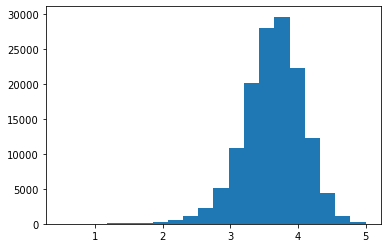

In [18]:
import matplotlib.pyplot as plt

plt.hist(user_ave,bins=20)

(array([ 183.,   16.,  236.,   73.,  330.,  318.,  821.,  697., 1851.,
        1414., 2533., 4387., 3980., 4524., 2911., 1778.,  288.,  266.,
          24.,  114.]),
 array([0.5  , 0.725, 0.95 , 1.175, 1.4  , 1.625, 1.85 , 2.075, 2.3  ,
        2.525, 2.75 , 2.975, 3.2  , 3.425, 3.65 , 3.875, 4.1  , 4.325,
        4.55 , 4.775, 5.   ]),
 <BarContainer object of 20 artists>)

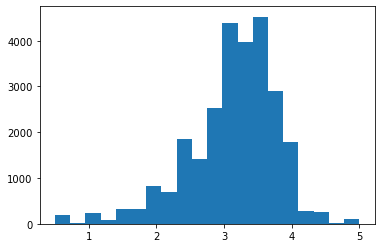

In [19]:
plt.hist(movie_ave,bins=20)

In [20]:
high_voice_movie=ratings[ratings.timestamp >='2014-4-1'].groupby('movieId')['rating'].count()
# in the past 1 year, the movie has more rating.

In [21]:
high_voice_movie=high_voice_movie.sort_values(ascending=False)

In [22]:
high_voice_movie[:100]

movieId
2571     2829
318      2797
79132    2766
58559    2668
4993     2449
         ... 
1214      966
3147      963
3949      955
4011      952
46578     950
Name: rating, Length: 100, dtype: int64

In [23]:
high_voice_movie[:100].index

Int64Index([  2571,    318,  79132,  58559,   4993,   2959,   7153,   5952,
            109374,    296, 112852,    858,    527,    593,    260,    356,
              1198,     50,  99114,   4226, 109487,   4973,   2858,   1196,
            111759,   3578,  68954, 111362,   4306, 106782, 112556,   6539,
             91529, 106920,  60069,   7361,   6377,   1193, 104841,  72998,
             89745,   2762,   2028,  68157,   5618,  59315,   1221,   6874,
              2329,   4886,  33794, 110102,   8961,  48516,    110, 106487,
             44191,  92259,  63082,  81845,   1197,   1136,   5418,   1704,
              4995,   4878,   4963,     47,   6016,   2324,  74458,   1210,
                 1,  48394,  91500,  48780,   7438, 108932,    608,  70286,
             54286,   1213,   3793,   1089, 106489,   1270,   1291,    589,
             76093,   5445,    541,   1682,  78499,   5349,   5989,   1214,
              3147,   3949,   4011,  46578],
           dtype='int64', name='movieId')

## Hot Recomdation: Recent 1 year with high views and rating 

In [24]:
movie_recom1 = []
for i in high_voice_movie[:100].index:
    if movie_ave[i] >= 4.2:    #4.2 is the average rating of the movie
        movie_recom1.append(i)   

In [25]:
movie_recom1

[318, 58559, 2959, 858, 527, 1198, 50, 1193, 5618, 1221, 6016]

In [27]:
movie_ave[318]

4.446990499637029

### Data inspecting for tags 


In [28]:
tags = pd.read_csv('data2/genome_scores.csv')

In [29]:
tags.shape

(11709768, 3)

In [30]:
tags.dtypes

movieId        int64
tagId          int64
relevance    float64
dtype: object

In [31]:
tags.isnull().sum()  #good data

movieId      0
tagId        0
relevance    0
dtype: int64

In [32]:
tags.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,11709768.0,25842.965803,34676.151996,1.00000,2926.00000,6017.0000,46062.0000,131170.0
tagId,11709768.0,564.500000,325.625438,1.00000,282.75000,564.5000,846.2500,1128.0
relevance,11709768.0,0.116483,0.154246,0.00025,0.02425,0.0565,0.1415,1.0


In [33]:
len(ratings[ratings['movieId'].isin(tags['movieId'])])

19800443

In [34]:
len(ratings[~ratings['movieId'].isin(tags['movieId'])])

199820

In [35]:
ratings[ratings['movieId'].isin(tags['movieId'])]['movieId'].nunique()

10370

In [36]:
ratings[~ratings['movieId'].isin(tags['movieId'])]['movieId'].nunique()

16374

In [37]:
tags['movieId'].nunique()

10381

only delete the movies don't have tags. Delete 16374 movies, but remain 99% of rating.
for sake of right size of matrix(20k users and 16k movies)

In [38]:
data=ratings[ratings['movieId'].isin(tags['movieId'])]


In [39]:
data=data[data['userId'].isin(user_active.index)]
len(data)

10780656

In [40]:
data['movieId'].nunique()

10369

### collaborative recommandation(movie_recom2) use data to reduce the size of the dataset

In [41]:
user_movie_matrix=pd.pivot_table(data,values='rating', index=['userId'], columns=['movieId'])

In [42]:
user_movie_matrix.sample(5)

movieId,1,2,3,4,5,6,7,8,9,10,...,130075,130087,130490,130496,130520,130578,130840,131013,131168,131170
userId,,,,,,,,,,,,,,,,,,,,,
89913,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67139,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49863,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127649,4.0,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115226,4.0,2.0,NaN,NaN,2.0,3.0,2.5,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
user_movie_matrix.shape

(20000, 10369)

In [44]:
from scipy.spatial.distance import hamming 

def nearestneighbours(user,K):
    # create a user df that contains all users except active user
    allUsers = pd.DataFrame(user_movie_matrix.index)  #only need user
    allUsers = allUsers[allUsers.userId!=user]
    # Add a column to this df which contains distance of active user to each user
    allUsers["distance"] = allUsers["userId"].apply(lambda x: hamming(user_movie_matrix.loc[user],user_movie_matrix.loc[x]))
    KnearestUsers = allUsers.sort_values(["distance"],ascending=True)["userId"][:K]   #.loc[index] return the rows
    return KnearestUsers

In [45]:
type(nearestneighbours(45008,5))  #nearestneighbours(45008,5) is a pd series

pandas.core.series.Series

In [46]:
import numpy as np
def topN(user,N=10):
    KnearestUsers = nearestneighbours(user,10)
    # get the ratings given by nearest neighbours
    neib_data = user_movie_matrix[user_movie_matrix.index.isin(KnearestUsers)]  #return 10 rows of matrix
    # Find the average rating of each movie rated by nearest neighbours
    avg_rating = neib_data.apply(np.nanmean).dropna()  #find the mean even lots of nan value
    # drop the movies already watched by active user
    movie_already_watch = user_movie_matrix.loc[user].dropna().index
    avg_rating = avg_rating[~avg_rating.index.isin(movie_already_watch)]  #series can use isin and index
    top_movies_id = avg_rating.sort_values(ascending=False).index[:N]
    return top_movies_id

## Collaborative Recommandation

In [49]:
topN(45008)

C:\Users\Michael Meng\anaconda3\lib\site-packages\pandas\core\apply.py:290: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)


Int64Index([25771, 94466, 7773, 49225, 846, 49917, 96829, 3913, 6902, 104944], dtype='int64', name='movieId')

## Try to content recommandation(use tags reference)

In [50]:
# comply with user_movie_matrix for collaborative recommentation
tags = tags[tags['movieId'].isin(user_movie_matrix.columns)]

In [51]:
tags['movieId'].nunique()

10369

In [52]:
allusers=user_movie_matrix.index  # an index

In [53]:
allusers

Int64Index([     7,     11,     24,     54,     58,     69,     82,     91,
                96,    104,
            ...
            138437, 138454, 138456, 138457, 138459, 138467, 138472, 138474,
            138483, 138493],
           dtype='int64', name='userId', length=20000)

In [54]:
movie_tag_matrix = pd.pivot_table(tags,values='relevance',index=['movieId'],columns=['tagId'])

In [55]:
movie_tag_matrix.shape

(10369, 1128)

In [56]:
#from scipy.spatial.distance import hamming 
def movie_nei(user, k):

    movies_watched=user_movie_matrix.loc[user].dropna().index
    user_tag_small=movie_tag_matrix[movie_tag_matrix.index.isin(movies_watched)]
    user_tag_mean=user_tag_small.apply(np.nanmean)
    
    allmovie=pd.DataFrame(movie_tag_matrix.index)    
    #allmovie['distance'] = allmovie['movieId'].apply(lambda x: hamming(user_tag_mean,movie_tag_matrix.loc[x]))
    allmovie['distance'] = allmovie['movieId'].apply(lambda x: sum(abs(user_tag_mean-movie_tag_matrix.loc[x])))
    
    allmovie=allmovie[~allmovie['movieId'].isin(movies_watched)]
    near_movies = allmovie.sort_values(['distance'],ascending=True)['movieId'][:k]
   
    return near_movies

## recom3

In [58]:
movie_nei(45008, 10)

8954      74152
5076       5847
5819       6902
10326    127098
3569       4035
5805       6884
9887     104069
7603      40946
9309      86347
3865       4371
Name: movieId, dtype: int64

In [59]:
type(movie_nei(45008, 10))

pandas.core.series.Series

In [60]:
print('recom1\n',movie_recom1,'\nrecom2 for 45008\n',topN(45008),'\nrecom3 for 45008\n',movie_nei(45008,10))

C:\Users\Michael Meng\anaconda3\lib\site-packages\pandas\core\apply.py:290: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)


recom1
 [318, 58559, 2959, 858, 527, 1198, 50, 1193, 5618, 1221, 6016] 
recom2 for 45008
 Int64Index([25771, 94466, 7773, 49225, 846, 49917, 96829, 3913, 6902, 104944], dtype='int64', name='movieId') 
recom3 for 45008
 8954      74152
5076       5847
5819       6902
10326    127098
3569       4035
5805       6884
9887     104069
7603      40946
9309      86347
3865       4371
Name: movieId, dtype: int64


## recom4 machine learning

In [61]:
movie = pd.read_csv('data2/movie.csv')

In [62]:
c=ratings[~ratings['movieId'].isin(movie['movieId'].values)]

In [63]:
c

,userId,movieId,rating,timestamp


In [187]:
ratings = data[data['movieId'].isin(movie['movieId'].values)]


In [188]:
data.shape

(10780656, 5)

In [190]:
data.index

Int64Index([     541,      542,      543,      544,      545,      546,
                 547,      548,      549,      550,
            ...
            20000252, 20000253, 20000254, 20000255, 20000257, 20000258,
            20000259, 20000260, 20000261, 20000262],
           dtype='int64', length=10780656)

In [189]:
data['movieId']

541             3
542             7
543            11
544            15
545            16
            ...  
20000258    68954
20000259    69526
20000260    69644
20000261    70286
20000262    71619
Name: movieId, Length: 10780656, dtype: int64

In [173]:
user_movie_matrix.columns

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            130075, 130087, 130490, 130496, 130520, 130578, 130840, 131013,
            131168, 131170],
           dtype='int64', name='movieId', length=10369)

In [175]:
movie[movie['movieId']==131013]

,movieId,title,genres
27192,131013,Get Hard (2015),Comedy


## Train_test split(the most recent movie as a test)

In [64]:
rand_userIds = np.random.choice(ratings['userId'].unique(), 
                                size=int(len(ratings['userId'].unique())*0.3), 
                                replace=False)

ratings = ratings.loc[ratings['userId'].isin(rand_userIds)]

In [65]:
ratings['recent'] = ratings.groupby(['userId'])['timestamp'].rank(method='max', ascending=False)


In [74]:
ratings.shape

(5955198, 5)

In [66]:
ratings.sample(5)

,userId,movieId,rating,timestamp,recent
2920801,19829,8464,4.0,2005-01-02 17:08:56,151.0
1597780,10775,1394,3.5,2004-11-26 15:32:43,87.0
8021178,55273,2248,4.0,2004-11-13 00:46:10,198.0
14246415,98401,2949,5.0,1999-11-09 10:17:30,200.0
12261443,84711,2997,5.0,2000-11-20 05:49:27,1029.0


In [67]:
train_ratings = ratings[ratings['recent'] > 1]
test_ratings = ratings[ratings['recent'] == 1]

# drop columns that we no longer need
train_ratings = train_ratings[['userId', 'movieId', 'rating']]
test_ratings = test_ratings[['userId', 'movieId', 'rating']]

In [68]:
train_ratings.loc[:, 'rating'] = 1
train_ratings.sample(5)

,userId,movieId,rating
6350647,43590,4727,1
8057108,55493,195,1
5477593,37639,165,1
10771754,74466,37733,1
18180646,125777,4785,1


In [69]:
train_ratings.shape

(5922192, 3)

In [70]:
from tqdm.notebook import tqdm

In [71]:
# Get a list of all movie IDs
all_movieIds = ratings['movieId'].unique()

# Placeholders that will hold the training data
users, items, labels = [], [], []

# This is the set of items that each user has interaction with
user_item_set = set(zip(train_ratings['userId'], train_ratings['movieId']))

In [72]:
len(user_item_set)

5922192

In [73]:
# 4:1 ratio of negative to positive samples
num_negatives = 4

for (u, i) in user_item_set:
    users.append(u)
    items.append(i)
    labels.append(1) # items that the user has interacted with are positive
    for _ in range(num_negatives):
        # randomly select an item
        negative_item = np.random.choice(all_movieIds) 
        # check that the user has not interacted with this item
        while (u, negative_item) in user_item_set:
            negative_item = np.random.choice(all_movieIds)
        users.append(u)
        items.append(negative_item)
        labels.append(0) # items not interacted with are negative


In [75]:
labels = np.array(labels)

In [76]:
labels

array([1, 0, 0, ..., 0, 0, 0])

In [77]:
users=np.expand_dims(users, 1)

In [78]:
users[:5]

array([[108564],
       [108564],
       [108564],
       [108564],
       [108564]])

In [79]:
users.max()

138491

In [81]:
items=np.expand_dims(items, 1)

In [82]:
items.max()

131262

In [83]:
len(np.unique(users))

41547

In [84]:
users.shape

(29610960, 1)

In [85]:
len(np.unique(items))

21420

In [93]:
labels.shape

(29610960,)

In [86]:
import tensorflow as tf
import keras
from tensorflow.keras import layers
from keras.models import Sequential  #Sequential from keras.models
from keras.layers import Dense 

In [87]:
num_users=len(np.unique(users))
num_items=len(np.unique(items))

user_input = keras.Input(shape=(None,), name="user") 
item_input = keras.Input(shape=(None,), name="item") 

user_features = layers.Embedding(users.max()+1, 64)(user_input)
item_features = layers.Embedding(items.max()+1, 64)(item_input)

x = layers.concatenate([user_features, item_features])
x = layers.Dense(units = 64, kernel_initializer = 'HeNormal', activation = 'relu')(x)
x = layers.Dense(units = 16, kernel_initializer = 'HeNormal', activation = 'relu')(x)
output=layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')(x)

model = keras.Model(inputs=[user_input, item_input],outputs=output)

In [88]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
item (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 64)     8863488     user[0][0]                       
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 64)     8400832     item[0][0]                       
______________________________________________________________________________________________

In [89]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [91]:
model.fit(
    {"user": users, "item": items},
    labels,
    epochs=4,
    batch_size=10000,
)

Epoch 1/4
2962/2962 [==============================] - 545s 183ms/step - loss: 0.2027 - accuracy: 0.9115
Epoch 2/4
2962/2962 [==============================] - 549s 185ms/step - loss: 0.1672 - accuracy: 0.9278
Epoch 3/4
2962/2962 [==============================] - 540s 182ms/step - loss: 0.1531 - accuracy: 0.9343
Epoch 4/4
2962/2962 [==============================] - 539s 182ms/step - loss: 0.1432 - accuracy: 0.9389


In [92]:
test_ratings.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [94]:
test_user=np.array(test_ratings['userId'])

In [95]:
test_user=np.expand_dims(test_user, 1)

In [96]:
test_user

array([[     8],
       [    14],
       [    20],
       ...,
       [138479],
       [138489],
       [138491]], dtype=int64)

In [97]:
test_movie=np.array(test_ratings['movieId'])
test_movie=np.expand_dims(test_movie,1)
test_movie

array([[  454],
       [46062],
       [ 1994],
       ...,
       [  480],
       [ 2858],
       [ 8961]], dtype=int64)

In [98]:
pred=model.predict(x=[test_user,test_movie], batch_size=128)

In [99]:
pred = np.where(pred < 0.5, 0, 1)

In [100]:
pred=pred.reshape(len(pred))

In [101]:
pred

array([1, 0, 1, ..., 1, 1, 1])

In [102]:
unique, counts = np.unique(pred, return_counts=True)

In [103]:
c = dict(zip(unique, counts))

## 73.2% recall rate(leave one out as test data)

In [104]:
ratio =c[1]/(c[0]+c[1])

In [105]:
ratio

0.7322002060231473

In [106]:
# Get a list of all movie IDs
all_movieIds = ratings['movieId'].unique()

# Placeholders that will hold the training data
users1, items1, labels1 = [], [], []

# This is the set of items that each user has interaction with
user_item_set = set(zip(test_ratings['userId'], test_ratings['movieId']))

In [107]:
# 4:1 ratio of negative to positive samples
num_negatives = 4

for (u, i) in user_item_set:
    users1.append(u)
    items1.append(i)
    labels1.append(1) # items that the user has interacted with are positive
    for _ in range(num_negatives):
        # randomly select an item
        negative_item = np.random.choice(all_movieIds) 
        # check that the user has not interacted with this item
        while (u, negative_item) in user_item_set:
            negative_item = np.random.choice(all_movieIds)
        users1.append(u)
        items1.append(negative_item)
        labels1.append(0) # items not interacted with are negative

In [108]:
users1=np.array(users1)
users1=np.expand_dims(users1,1)
items1=np.array(items1)
items1=np.expand_dims(items1,1)
labels1=np.array(labels1)


In [109]:
print(len(users1),len(items1),len(labels1))

165030 165030 165030


In [110]:
len(users1)

165030

In [111]:
len(items1)

165030

In [112]:
len(labels1)

165030

In [113]:
pred1=model.predict(x=[users1,items1], batch_size=128)

In [116]:
pred1 = np.where(pred1 < 0.5, 0, 1)

In [117]:
pred1 = pred1.reshape(len(pred1))

In [119]:
from sklearn.metrics import classification_report
print(classification_report(labels1, pred1))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95    132024
           1       0.81      0.73      0.77     33006

    accuracy                           0.91    165030
   macro avg       0.87      0.84      0.86    165030
weighted avg       0.91      0.91      0.91    165030



In [348]:
dis = abs(pred1-labels1)

In [349]:
unique, counts = np.unique(dis, return_counts=True)
c = dict(zip(unique, counts))

## Accuracy is 91.26%(test data with 20% positive and 80% negative data)
## The negative data maybe slightly leaked, they are trained during process, need find a way to resplit train-test part. But the results is good

In [350]:
ratio =c[0]/(c[0]+c[1])
ratio

0.9126864766525167

## Save and load model

In [351]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model1 = load_model('my_model.h5')

In [352]:
pred2=model1.predict(x=[users1,items1], batch_size=128)

In [354]:
pred2= np.where(pred2 < 0.5, 0, 1)

In [356]:
pred2 = pred2.reshape(len(pred1))

In [357]:
dis = abs(pred2-labels1)

In [358]:
unique, counts = np.unique(dis, return_counts=True)
c = dict(zip(unique, counts))

In [359]:
ratio =c[0]/(c[0]+c[1])
ratio

0.9126864766525167

## for some userId recommand movie

In [425]:
def model_reco(user, n):
    model1 = load_model('my_model.h5')
    all_movieIds = ratings['movieId'].unique()
    movie_watched= ratings[ratings['userId']==user]['movieId'].unique()
    all_movieIds = all_movieIds[np.isin(all_movieIds, movie_watched, invert=True)]
    all_movieIds=np.expand_dims(all_movieIds,1)
    num_movies=len(all_movieIds)
    user_expand = np.full((num_movies,1),user)
    pred=model1.predict(x=[user_expand,all_movieIds], batch_size=128)
    df = pd.DataFrame([all_movieIds.reshape(num_movies),pred.reshape(num_movies)]).T
    df = df.rename(columns={0 : 'movie', 1: 'pred'})
    df = df.sort_values(['pred'],ascending=False)

    return df[:n]

In [429]:
model_reco(138478,50)

,movie,pred
210,2959.0,0.998357
925,3996.0,0.997410
250,4226.0,0.997332
208,2858.0,0.996961
227,3578.0,0.995954
40,260.0,0.994169
1095,2502.0,0.993787
203,2762.0,0.993062
272,4973.0,0.991718
636,3751.0,0.991525


In [427]:
movie_watched= ratings[ratings['userId']==12]['movieId'].unique()
movie_watched

array([  1,   3,   5,   6,   7,  17,  32,  34,  36,  95, 104, 110, 208,
       231, 260, 344, 356, 364, 376, 380, 480, 494, 527, 585, 589, 590,
       595, 608, 648, 653, 733, 736, 780, 784, 786, 788], dtype=int64)